In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [6]:
train.shape

(15223, 52)

In [7]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
y = train['TARGET']

In [11]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [13]:
all_data = pd.concat([train, test])

In [14]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [15]:
# посмотрим типы данных и их заполняемость

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [17]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [18]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Два и более высших образования', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень', 'Среднее', 'Высшее'}

MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке'}

GEN_INDUSTRY
{nan, 'Салоны красоты и здоровья', 'Информационные технологии', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Государственная служба', 'ЧОП/Детективная д-ть', 'Транспорт', 'Сборочные производства', 'Туризм', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Энергетика', 'Строительство', 'Торговля', 'Другие сферы', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Развлечения/Искусство', 'Подбор персонала', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Маркетинг', 'Страхование', 'Юридические услуги/нотариальные услуги', 'Наука', 'Образование', 'СМИ/Реклама/PR-агенства', 'Управляющая компания', 'Недвижимость'}

GEN_TITLE
{na

In [19]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [20]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [21]:
# причина же что использовалась запятая для разделения не целой части числа

In [22]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [24]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Неполное среднее', 'Два и более высших образования', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень', 'Среднее', 'Высшее'}

MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке'}

GEN_INDUSTRY
{nan, 'Салоны красоты и здоровья', 'Информационные технологии', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Государственная служба', 'ЧОП/Детективная д-ть', 'Транспорт', 'Сборочные производства', 'Туризм', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Энергетика', 'Строительство', 'Торговля', 'Другие сферы', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Развлечения/Искусство', 'Подбор персонала', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Маркетинг', 'Страхование', 'Юридические услуги/нотариальные услуги', 'Наука', 'Образование', 'СМИ/Реклама/PR-агенства', 'Управляющая компания', 'Недвижимость'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

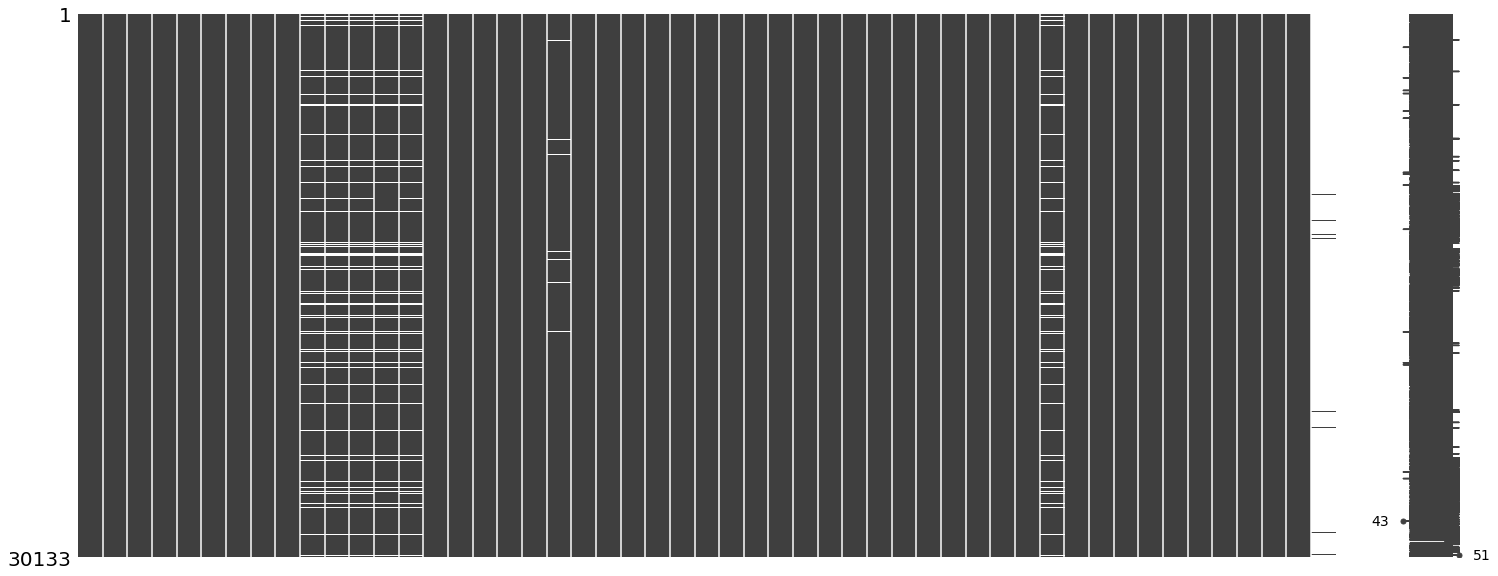

In [25]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

msno.matrix(all_data, sort = 'Ascending')

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [27]:
all_data = pd.get_dummies(all_data)

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 443 entries, AGREEMENT_RK to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(405)
memory usage: 20.4 MB


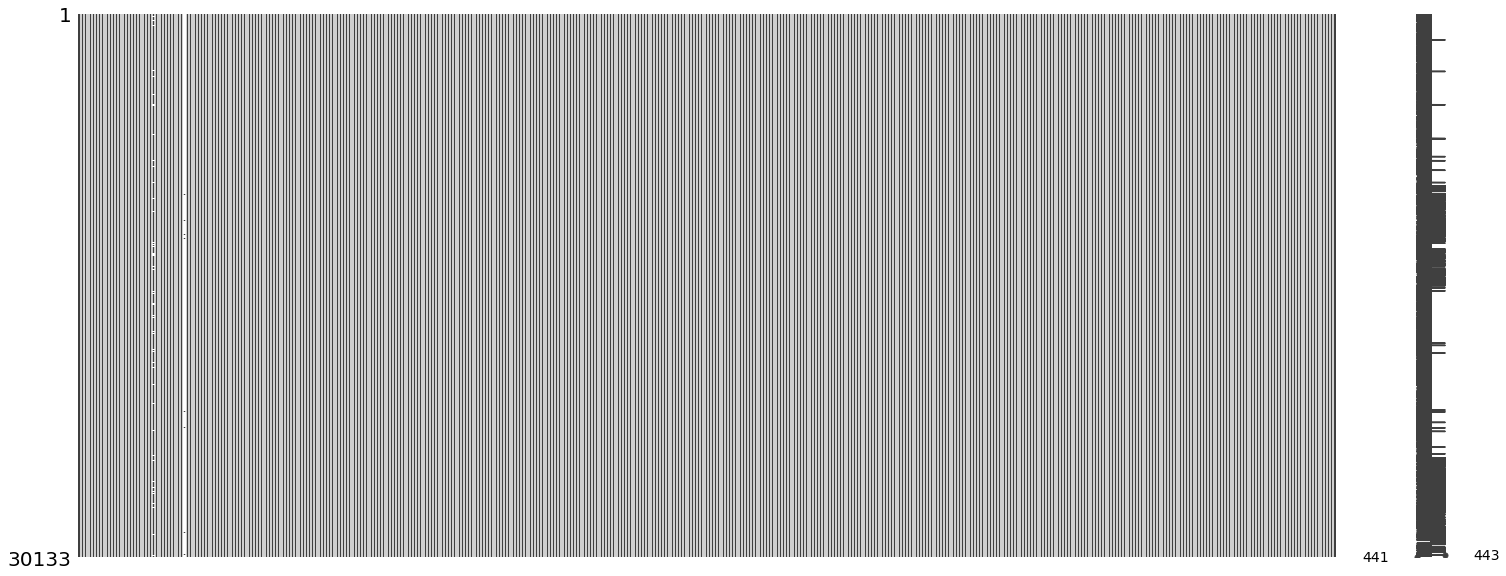

In [29]:
msno.matrix(all_data, sort = 'Ascending')

In [30]:
all_data = all_data.fillna(all_data.mean())

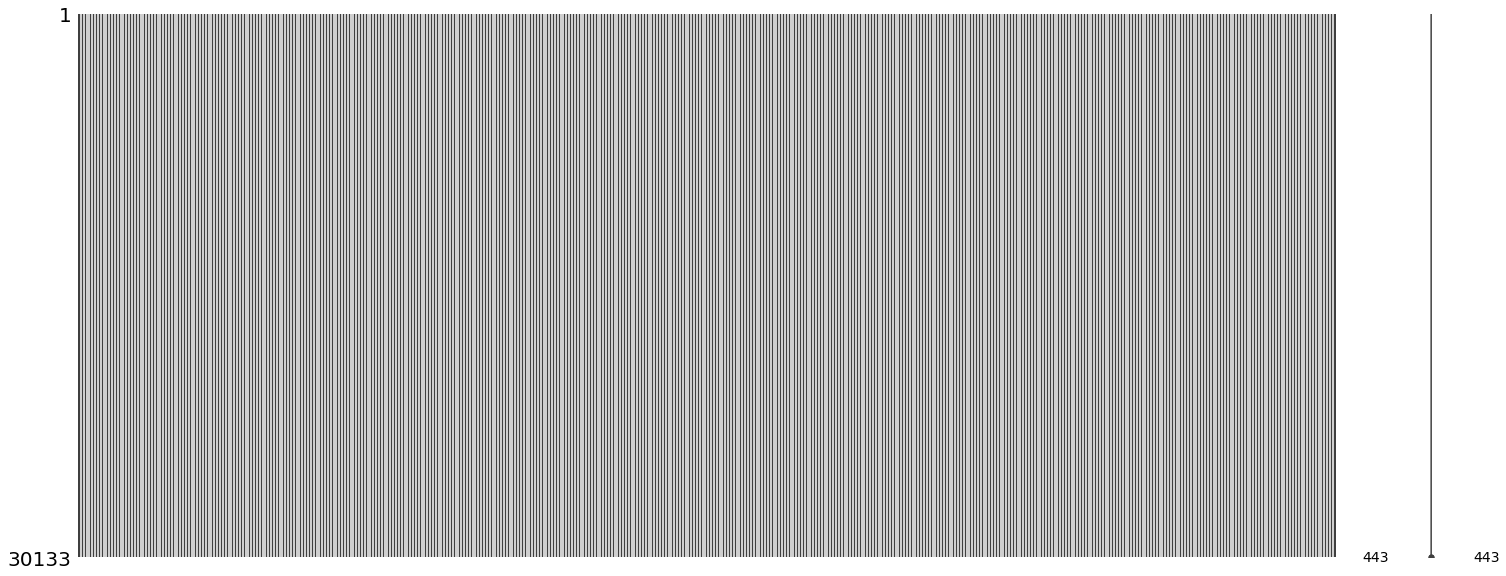

In [31]:
msno.matrix(all_data, sort = 'Ascending')

In [32]:
# Как поступить со строковыми переменными?

# Ваш код :-)

all_data.head()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,59910150,49,1,0,1,2,1,5000.0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,59910230,32,1,0,1,3,3,12000.0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,59910525,52,1,0,1,4,0,9000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,59910803,39,1,0,1,1,1,25000.0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,59911781,30,1,0,0,0,0,12000.0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# В итоге должны получиться данные без пропусков и только числовые

In [34]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train = all_data.iloc[:15223]
test = all_data.iloc[-14910:]

In [35]:
# Сделать hold-out sampling на train выборке
from sklearn.model_selection import train_test_split

# test_size=0.3, random_state=42

# Ваш код :-)


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(train, y, test_size = 0.3, random_state = 42)

In [37]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)

In [38]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, Y_train)
predict_dtc = dtc.predict(X_test)
predict_dtc_proba = dtc.predict_proba(X_test)

In [39]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, Y_train)
predict_rfc = rfc.predict(X_test)
predict_rfc_proba = rfc.predict_proba(X_test)

In [40]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, Y_train)
predict_lr = lr.predict(X_test)
predict_lr_proba = lr.predict_proba(X_test)

In [41]:
print(predict_dtc), print(predict_dtc_proba)

[1 0 1 ..., 0 0 0]
[[ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


(None, None)

In [42]:
print(predict_rfc), print(predict_rfc_proba)

[0 0 0 ..., 0 0 0]
[[ 0.9  0.1]
 [ 0.7  0.3]
 [ 0.9  0.1]
 ..., 
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.9  0.1]]


(None, None)

In [43]:
print(predict_lr), print(predict_lr_proba)

[0 0 0 ..., 0 0 0]
[[ 0.84946403  0.15053597]
 [ 0.85377973  0.14622027]
 [ 0.86408377  0.13591623]
 ..., 
 [ 0.86309792  0.13690208]
 [ 0.86599334  0.13400666]
 [ 0.8860268   0.1139732 ]]


(None, None)

In [44]:
# Посчитать метрики стандартные
# accuracy, precision, recall

# Ваш код :-)
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [45]:
acc_dtc = accuracy_score(Y_test, predict_dtc)

In [46]:
prec_dtc = precision_score(Y_test, predict_dtc)

In [47]:
rec_dtc = recall_score(Y_test, predict_dtc)

In [48]:
acc_rfc = accuracy_score(Y_test, predict_rfc)

In [49]:
prec_rfc = precision_score(Y_test, predict_rfc)

In [50]:
rec_rfc = recall_score(Y_test, predict_rfc)

In [51]:
acc_lr = accuracy_score(Y_test, predict_lr)

In [52]:
prec_lr = precision_score(Y_test, predict_lr)

F:\AnacondaPython3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
rec_lr = recall_score(Y_test, predict_lr)

In [54]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)
from sklearn.metrics import precision_recall_curve

In [56]:
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(Y_test, predict_dtc_proba[:, 1])
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(Y_test, predict_rfc_proba[:, 1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(Y_test, predict_lr_proba[:, 1])

(-0.01, 1.01)

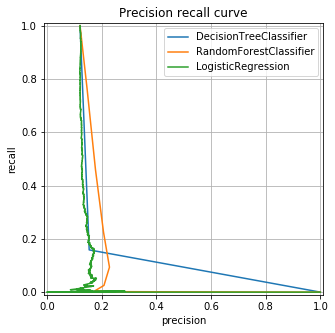

In [69]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize = (5, 5))
plt.plot(precision_dtc, recall_dtc, label = 'DecisionTreeClassifier')
plt.plot(precision_rfc, recall_rfc, label = 'RandomForestClassifier')
plt.plot(precision_lr, recall_lr, label = 'LogisticRegression')
plt.legend()
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid(True)
plt.title('Precision recall curve')
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)

(-0.01, 1.01)

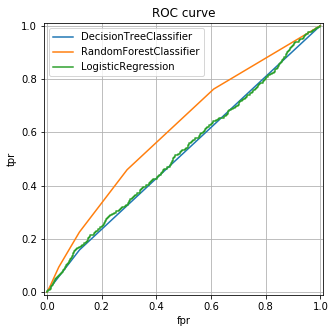

In [71]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)
from sklearn.metrics import roc_curve, roc_auc_score
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(Y_test, predict_dtc_proba[:, 1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(Y_test, predict_rfc_proba[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, predict_lr_proba[:, 1])
%matplotlib inline 
from matplotlib import pyplot as plt
plt.figure(figsize =(5, 5))
plt.plot(fpr_dtc, tpr_dtc, label = 'DecisionTreeClassifier')
plt.plot(fpr_rfc, tpr_rfc, label = 'RandomForestClassifier')
plt.plot(fpr_lr, tpr_lr, label = 'LogisticRegression')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)

In [72]:
roc_auc_score_dtc = roc_auc_score(Y_test, predict_dtc_proba[:, 1])
roc_auc_score_rfc = roc_auc_score(Y_test, predict_rfc_proba[:, 1])
roc_auc_score_lr = roc_auc_score(Y_test, predict_lr_proba[:, 1])
print('roc_auc_score_dtc', roc_auc_score_dtc)
print('roc_auc_score_rfc', roc_auc_score_rfc)
print('roc_auc_score_lr', roc_auc_score_lr)

roc_auc_score_dtc 0.519458740894
roc_auc_score_rfc 0.610565825047
roc_auc_score_lr 0.525294836212


In [73]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)
cross_val_score_dtc = cross_val_score(dtc, X_train, Y_train, scoring = 'roc_auc', cv=10)
cross_val_score_rfc = cross_val_score(rfc, X_train, Y_train, scoring = 'roc_auc', cv=10)
cross_val_score_lr = cross_val_score(lr, X_train, Y_train, scoring = 'roc_auc', cv=10)

F:\AnacondaPython3.6\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [74]:
print('cross_val_score_dtc', cross_val_score_dtc)
print('cross_val_score_rfc', cross_val_score_rfc)
print('cross_val_score_lr', cross_val_score_lr)

cross_val_score_dtc [ 0.52510976  0.54625971  0.5174181   0.51950355  0.53623776  0.53799392
  0.51103512  0.4793617   0.54389362  0.52675186]
cross_val_score_rfc [ 0.61786981  0.61631628  0.59121074  0.53632219  0.60316194  0.61989615
  0.56007683  0.54268511  0.57974043  0.58050266]
cross_val_score_lr [ 0.51840594  0.55335191  0.50303951  0.51895475  0.55426376  0.55102161
  0.51538332  0.56990638  0.52245957  0.54197231]


In [75]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [78]:
print(rfc.predict(X_test))

[0 0 0 ..., 0 0 0]
